## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

from sklearn.impute import SimpleImputer

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Loading ten variables datasets

In [2]:
#df = pd.read_csv("/mnt/workstation/data/input_Pesos_Dic_20.csv")#, sep= ",", names =header)
topten = pd.read_csv("/mnt/workstation/data/Input_Topten.csv")
middleten = pd.read_csv("/mnt/workstation/data/Aggregate_20_30.csv")
lastten = pd.read_csv("/mnt/workstation/data/Aggregate_last_10_v2.csv")
labels = pd.read_csv("/mnt/workstation/data/labels.csv")

In [3]:
topten.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'nivel_academico',
       'profesion', 'ocupacion', 'tipo_vivienda', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'cat_ingreso', 'rep_calif_cred', 'ind_mora_vigente',
       'cartera_castigada', 'tenencia_tc', 'tiene_consumo', 'tiene_crediagil',
       'tiene_ctas_activas', 'tiene_ctas_embargadas', 'pension_fopep',
       'tiene_cred_hipo_1', 'tiene_cred_hipo_2'],
      dtype='object')

In [4]:
topten = topten.drop(columns=['departamento_residencia',
                                    'ciudad_laboral',
                                    'departamento_laboral',
                                ], axis=0)

In [5]:
middleten.columns

Index(['Unnamed: 0', 'id_cli', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'periodo', 'ctas_activas',
       'ctas_embargadas', 'cupo_tc_mdo', 'saldo_prom3_tdc_mdo',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio'],
      dtype='object')

In [6]:
middleten = middleten.drop(columns=['periodo',
                                    'ctas_activas',
                                    'ctas_embargadas',
                                    'saldo_prom3_tdc_mdo',
                                    'cupo_tc_mdo'
                                    ], axis=0)

In [7]:
lastten.columns

Index(['Unnamed: 0', 'id_cli', 'pol_centr_ext', 'saldo_prom3_tdc_mdo',
       'cupo_tc_mdo', 'cant_oblig_tot_sf', 'cant_cast_ult_12m_sr',
       'saldo_no_rot_mdo', 'ind', 'gasto_familiar'],
      dtype='object')

## Merging

In [8]:
topten.shape

(1047955, 31)

In [9]:
df_Xcli = topten.merge(middleten.iloc[:,1:], on="id_cli", how='left')
df_Xcli.shape

(1047955, 44)

In [10]:
df_Xcli = df_Xcli.merge(lastten.iloc[:,1:], on="id_cli", how='left')
df_Xcli.shape

(1047955, 52)

## Cleaning

In [11]:
df_Xcli['mora_max'] = df_Xcli['mora_max'].replace(np.nan,0)
df_Xcli['cant_moras_30_ult_12_meses'] = df_Xcli['cant_moras_30_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_moras_60_ult_12_meses'] = df_Xcli['cant_moras_60_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_moras_90_ult_12_meses'] = df_Xcli['cant_moras_90_ult_12_meses'].replace(np.nan,0)
df_Xcli['cant_mora_30_tdc_ult_3m_sf'] = df_Xcli['cant_mora_30_tdc_ult_3m_sf'].replace(np.nan,0)
df_Xcli['cant_mora_30_consum_ult_3m_sf'] = df_Xcli['cant_mora_30_consum_ult_3m_sf'].replace(np.nan,0)
df_Xcli['cant_oblig_tot_sf'] = df_Xcli['cant_oblig_tot_sf'].replace(np.nan,0)
df_Xcli['cant_cast_ult_12m_sr'] = df_Xcli['cant_cast_ult_12m_sr'].replace(np.nan,0)

In [12]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [13]:
for i in features_b:
    df_Xcli[i] = df_Xcli[i].astype('int')

In [14]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [15]:
df_Xcli[features_o].describe(include='all').T

,count,unique,top,freq
genero,1047955,2,M,530231
estado_civil,949251,5,SOLTERO,482243
nivel_academico,733161,6,UNIVERSITARIO,376528
profesion,746409,79,OTROS,296090
ocupacion,1044763,10,Empleado,661615
tipo_vivienda,491729,3,FAMILIAR,238118
ciudad_residencia,1047380,1434,BOGOTA D.C.,266005
rechazo_credito,3057,4,RECHAZO BIZAGI,2781
cat_ingreso,401892,3,NOM,337884
rep_calif_cred,953420,8,A,220173


In [16]:
df_Xcli[features_f].describe().T

,count,mean,std,min,25%,50%,75%,max
id_cli,1047955.0,3.400356e+06,2.464904e+06,3.000000e+00,1.375613e+06,2.901195e+06,4.956733e+06,8.704800e+06
edad,1047955.0,4.198367e+01,1.377550e+01,1.900000e+01,3.100000e+01,3.900000e+01,5.100000e+01,1.200000e+02
mora_max,1047955.0,7.858711e+00,3.053172e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,1047955.0,1.380059e-01,8.179124e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,1047955.0,7.258136e-02,6.332952e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_90_ult_12_meses,1047955.0,4.812516e-02,5.237258e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cupo_total_tc,1047955.0,4.281256e+06,1.007153e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.614967e+06,5.451097e+08
codigo_ciiu,1047955.0,9.111176e+02,2.315126e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
ctas_activas,1047954.0,1.049415e+00,4.020435e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047954.0,3.114641e-03,5.917691e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00


Text(199.0, 0.5, 'rows')

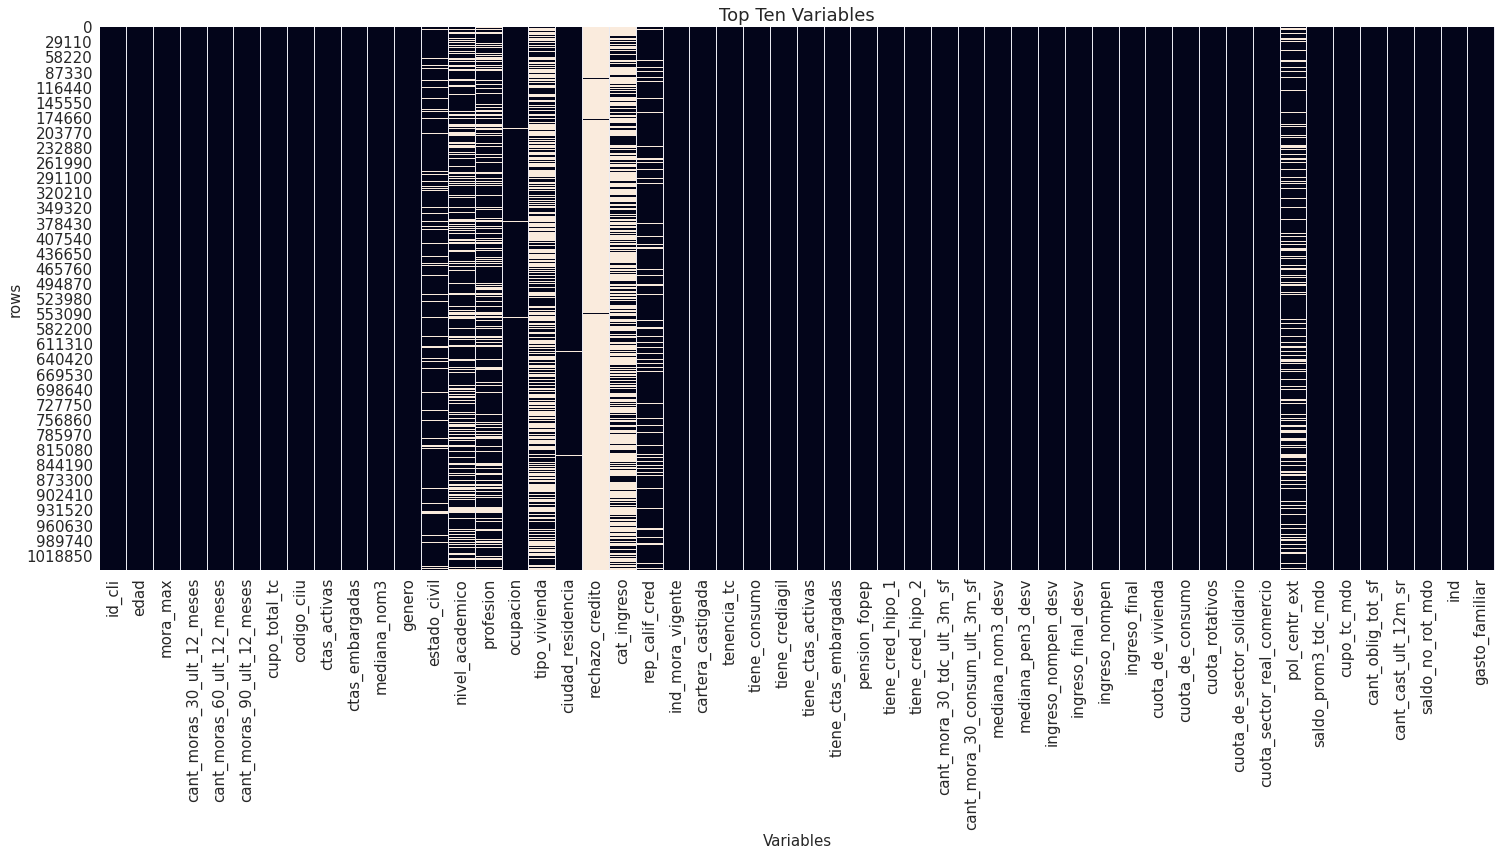

In [17]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
sns.heatmap(df_Xcli.isnull(), cbar=False)
plt.title("Top Ten Variables")
plt.xlabel('Variables')
plt.ylabel('rows')

## Dismiss Variables

In [18]:
Nulos = 100*df_Xcli.isnull().sum()/df_Xcli.shape[0]
Nulos = pd.DataFrame(Nulos)
variables_nulas = Nulos[Nulos[0]>31]
variables_nulas

,0
tipo_vivienda,53.077279
rechazo_credito,99.708289
cat_ingreso,61.649880


In [19]:
df_Xcli = df_Xcli.drop(list(variables_nulas.index), axis=1)
df_Xcli.shape

(1047955, 49)

In [20]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

## To complete variables

In [21]:
Nulos = 100*df_Xcli.isnull().sum()/df_Xcli.shape[0]
Nulos = pd.DataFrame(Nulos)
Nulos[Nulos[0]!=0]

,0
ctas_activas,0.000095
ctas_embargadas,0.000095
estado_civil,9.418725
nivel_academico,30.038885
profesion,28.774709
ocupacion,0.304593
ciudad_residencia,0.054869
rep_calif_cred,9.020903
mediana_nom3_desv,0.161839
mediana_pen3_desv,0.161839


## Labeling

In [22]:
labels

,Categoria,Particip,Variable,Label,Var_mean
0,CASADO,9.678370e+05,estado_civil,5,gasto_familiar
1,UNION LIBRE,8.678049e+05,estado_civil,4,gasto_familiar
2,DIVORCIADO,7.881397e+05,estado_civil,3,gasto_familiar
3,VIUDO,6.969590e+05,estado_civil,2,gasto_familiar
4,SOLTERO,6.912766e+05,estado_civil,1,gasto_familiar
...,...,...,...,...,...
9109,D,1.101550e+06,rep_calif_cred,5,ingreso_nompen
9110,F,1.099701e+06,rep_calif_cred,4,ingreso_nompen
9111,G,1.099355e+06,rep_calif_cred,3,ingreso_nompen
9112,H,1.095841e+06,rep_calif_cred,2,ingreso_nompen


In [23]:
for j in ['ind','gasto_familiar','ingreso_nompen']:
    for i in features_o:
        tag = labels[labels['Var_mean'] ==j]
        tmp = pd.pivot_table(tag[tag['Categoria'].isin(df_Xcli[i].unique())][['Categoria','Label']],
                       values='Label',
                       columns='Categoria').round()
        tmp = tmp.T.to_dict()['Label']
        nueva_variable = i+'_tag_'+j
        df_Xcli[nueva_variable] = df_Xcli[i].map(tmp)

In [24]:
conditions = [
    (df_Xcli['genero'] == 'M'),
    (df_Xcli['genero'] == 'F')
]
values = [2,1]
df_Xcli['genero_tag'] = np.select(conditions, values)

In [25]:
df_Xcli.columns

Index(['id_cli', 'edad', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'codigo_ciiu', 'ctas_activas', 'ctas_embargadas',
       'mediana_nom3', 'genero', 'estado_civil', 'nivel_academico',
       'profesion', 'ocupacion', 'ciudad_residencia', 'rep_calif_cred',
       'ind_mora_vigente', 'cartera_castigada', 'tenencia_tc', 'tiene_consumo',
       'tiene_crediagil', 'tiene_ctas_activas', 'tiene_ctas_embargadas',
       'pension_fopep', 'tiene_cred_hipo_1', 'tiene_cred_hipo_2',
       'cant_mora_30_tdc_ult_3m_sf', 'cant_mora_30_consum_ult_3m_sf',
       'mediana_nom3_desv', 'mediana_pen3_desv', 'ingreso_nompen_desv',
       'ingreso_final_desv', 'ingreso_nompen', 'ingreso_final',
       'cuota_de_vivienda', 'cuota_de_consumo', 'cuota_rotativos',
       'cuota_de_sector_solidario', 'cuota_sector_real_comercio',
       'pol_centr_ext', 'saldo_prom3_tdc_mdo', 'cupo_tc_mdo',
       'cant_oblig_tot_sf', 'can

# Numeric final data to complete

In [26]:
features = pd.DataFrame(df_Xcli.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [27]:
df_Xcli = df_Xcli.drop(features_o, axis=1)
df_Xcli.shape

(1047955, 64)

In [28]:
df_Xcli.describe().T.head(60)

,count,mean,std,min,25%,50%,75%,max
id_cli,1047955.0,3.400356e+06,2.464904e+06,3.000000e+00,1.375613e+06,2.901195e+06,4.956733e+06,8.704800e+06
edad,1047955.0,4.198367e+01,1.377550e+01,1.900000e+01,3.100000e+01,3.900000e+01,5.100000e+01,1.200000e+02
mora_max,1047955.0,7.858711e+00,3.053172e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,1047955.0,1.380059e-01,8.179124e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,1047955.0,7.258136e-02,6.332952e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_90_ult_12_meses,1047955.0,4.812516e-02,5.237258e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cupo_total_tc,1047955.0,4.281256e+06,1.007153e+07,0.000000e+00,0.000000e+00,0.000000e+00,4.614967e+06,5.451097e+08
codigo_ciiu,1047955.0,9.111176e+02,2.315126e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
ctas_activas,1047954.0,1.049415e+00,4.020435e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01
ctas_embargadas,1047954.0,3.114641e-03,5.917691e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00


In [29]:
df_Xcli.to_csv("/mnt/workstation/data/dataXid_2complete.csv", index=False)